# Visualize coin data to spot specifications

In [9]:
import os
import os.path
import time
import h5py
from util.settings import Dtype, Settings
import numpy as np4
import argparse
import matplotlib.pyplot as pRt
from datafileviewer_template import DataFileViewer
from datafilereader import DataFileReader
import matplotlib
import pandas as pd

### load Data

In [10]:
folder = "./data/Groupe5/dataSetAGF-bobine3/"
dataset = DataFileReader(folder+"5_CTS.h5")
f,Z_5ct = dataset.get_all_mesurements()
dataset = DataFileReader(folder+"10_CTS.h5")
_,Z_10ct = dataset.get_all_mesurements()
dataset = DataFileReader(folder+"20_CTS.h5")
_,Z_20ct = dataset.get_all_mesurements()
dataset = DataFileReader(folder+"50_CTS.h5")
_,Z_50ct = dataset.get_all_mesurements()
dataset = DataFileReader(folder+"1_CHF.h5")
_,Z_1chf = dataset.get_all_mesurements()
dataset = DataFileReader(folder+"2_CHF.h5")
_,Z_2chf = dataset.get_all_mesurements()
dataset = DataFileReader(folder+"5_CHF.h5")
_,Z_5chf = dataset.get_all_mesurements()

# Function to separate resistance (real part) and reactance (imaginary part)
def separate_resistance_reactance(Z,F):
    df = pd.DataFrame(Z, columns=[f"Freq_{i}" for i in range(Z.shape[1])])
    resistance_df = df.map(lambda x: np.real(x))
    reactance_df = df.map(lambda x: np.imag(x))
    reactance_df = reactance_df/(2*np.pi*F)
    return resistance_df, reactance_df



R_5ct,L_5ct = separate_resistance_reactance(Z_5ct,f)
R_10ct,L_10ct = separate_resistance_reactance(Z_10ct,f)
R_20ct,L_20ct = separate_resistance_reactance(Z_20ct,f)
R_50ct,L_50ct = separate_resistance_reactance(Z_50ct,f)
R_1chf,L_1chf = separate_resistance_reactance(Z_1chf,f)
R_2chf,L_2chf = separate_resistance_reactance(Z_2chf,f)
R_5chf,L_5chf = separate_resistance_reactance(Z_5chf,f)


NameError: name 'np' is not defined

### compute mean for each coin

In [ ]:
L_5ct_mean = np.mean(L_5ct, axis=0)
L_10ct_mean = np.mean(L_10ct, axis=0)
L_20ct_mean = np.mean(L_20ct, axis=0)
L_50ct_mean = np.mean(L_50ct, axis=0)
L_1chf_mean = np.mean(L_1chf, axis=0)
L_2chf_mean = np.mean(L_2chf, axis=0)
L_5chf_mean = np.mean(L_5chf, axis=0)

R_5ct_mean = np.mean(R_5ct, axis=0)
R_10ct_mean = np.mean(R_10ct, axis=0)
R_20ct_mean = np.mean(R_20ct, axis=0)
R_50ct_mean = np.mean(R_50ct, axis=0)
R_1chf_mean = np.mean(R_1chf, axis=0)
R_2chf_mean = np.mean(R_2chf, axis=0)
R_5chf_mean = np.mean(R_5chf, axis=0)

### visualize data

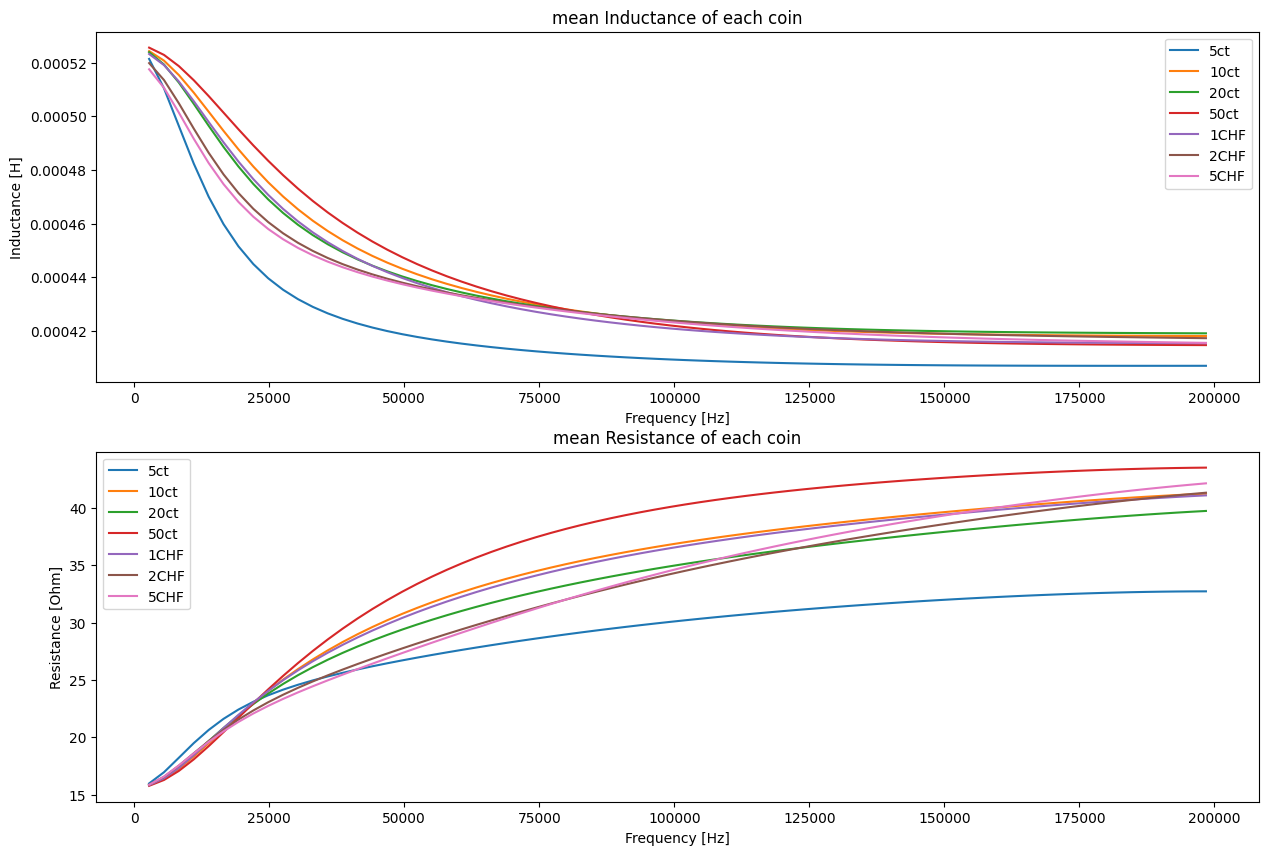

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.title("mean Inductance of each coin")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Inductance [H]")
plt.plot(f, L_5ct_mean, label="5ct")
plt.plot(f, L_10ct_mean, label="10ct")
plt.plot(f, L_20ct_mean, label="20ct")
plt.plot(f, L_50ct_mean, label="50ct")
plt.plot(f, L_1chf_mean, label="1CHF")
plt.plot(f, L_2chf_mean, label="2CHF")
plt.plot(f, L_5chf_mean, label="5CHF")
plt.legend()
plt.subplot(2,1,2)
plt.title("mean Resistance of each coin")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Resistance [Ohm]")
plt.plot(f, R_5ct_mean, label="5ct")
plt.plot(f, R_10ct_mean, label="10ct")
plt.plot(f, R_20ct_mean, label="20ct")
plt.plot(f, R_50ct_mean, label="50ct")
plt.plot(f, R_1chf_mean, label="1CHF")
plt.plot(f, R_2chf_mean, label="2CHF")
plt.plot(f, R_5chf_mean, label="5CHF")
plt.legend()
plt.show()